In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
!pip install imageio
!pip install git+https://github.com/tensorflow/docs
from tensorflow_docs.vis import embed
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import imageio

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-z550sv3l
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-z550sv3l
  Resolved https://github.com/tensorflow/docs to commit 70174a87eb9c39b6f71d948801e140e9436e66e8
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.12.6.69331-py3-none-any.whl size=181263 sha256=0921927e08ef75d4e5f2f3e6e05f245da8eab92c5e4d62f2f2187c3493381c14
  Stored in directory: /tmp/pip-ephem-wheel-cache-_kseal3_/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [ ]:
#This was just to test shape
#(x_train2, y_train2), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


In [ ]:
batch_size = 64
num_channels = 1
num_classes = 10
image_size = 28
latent_dim = 128

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)

In [ ]:
x_train = (x_train - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
print(x_train[0])

[[[-0.5372549  -0.51372549 -0.50588235]
  [-0.6627451  -0.63921569 -0.64705882]
  [-0.60784314 -0.62352941 -0.6627451 ]
  ...
  [ 0.23921569  0.03529412 -0.15294118]
  [ 0.19215686 -0.01960784 -0.2       ]
  [ 0.16078431 -0.02745098 -0.19215686]]

 [[-0.8745098  -0.84313725 -0.84313725]
  [-1.         -1.         -1.        ]
  [-0.85882353 -0.9372549  -1.        ]
  ...
  [-0.03529412 -0.30980392 -0.56862745]
  [-0.06666667 -0.34901961 -0.60784314]
  [-0.04313725 -0.31764706 -0.55294118]]

 [[-0.80392157 -0.81176471 -0.83529412]
  [-0.8745098  -0.94509804 -1.        ]
  [-0.61568627 -0.78823529 -0.9372549 ]
  ...
  [-0.0745098  -0.34117647 -0.60784314]
  [-0.05882353 -0.34117647 -0.60784314]
  [-0.14509804 -0.42745098 -0.67058824]]

 ...

 [[ 0.63137255  0.33333333 -0.24705882]
  [ 0.57647059  0.2        -0.73333333]
  [ 0.55294118  0.2627451  -0.79607843]
  ...
  [ 0.25490196  0.04313725 -0.45098039]
  [-0.56078431 -0.75686275 -0.94509804]
  [-0.58431373 -0.73333333 -0.84313725]]

 [

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
latent_dim = 100

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [ ]:
# def make_generator_model():
#     model = tf.keras.Sequential()
#     model.add(layers.Dense(4 * 4 * 256, use_bias=False, input_shape=(100,)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU())

#     model.add(layers.Reshape((4, 4, 256)))
#     assert model.output_shape == (None, 4, 4, 256)  # Note: None is the batch size

#     model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU(alpha=0.2))

#     model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
#     model.add(layers.BatchNormalization())
#     model.add(layers.LeakyReLU(alpha=0.2))

#     model.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
#     assert model.output_shape == (None, 32, 32, 3)

#     return model

generator = tf.keras.Sequential()
generator.add(layers.Dense(4*4*256, use_bias=False, input_shape=(latent_dim,)))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Reshape((4, 4, 256)))

generator.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
generator.add(layers.BatchNormalization())
generator.add(layers.LeakyReLU())

generator.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))


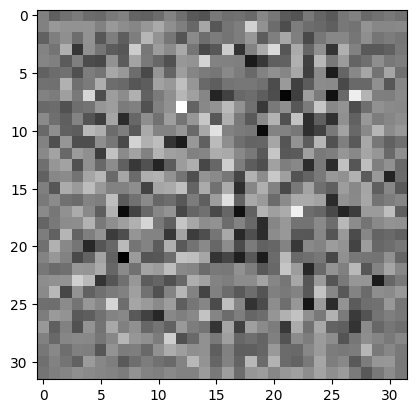

In [ ]:
# Untrained generator!
# Generates garbage/noise
# generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
# def make_discriminator_model():
#     model = tf.keras.Sequential()
#     model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
#                                      input_shape=[32, 32, 3]))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Dropout(0.3))

#     model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Dropout(0.3))

#     model.add(layers.Flatten())
#     model.add(layers.Dense(1, activation='sigmoid'))

#     return model

discriminator = tf.keras.Sequential()

discriminator.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                  input_shape=[32, 32, 3]))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))

discriminator.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator.add(layers.LeakyReLU())
discriminator.add(layers.Dropout(0.3))

discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Untrained discriminator!
# Generates noise/garbage
# discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.49991596]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
# Loss function for the generator
# If the discriminator classifies fake images (class 0) as real (class 1), the loss is lowest
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

#THANK YOU SO MUCH FOR HAVING SO MUCH SAMPLE CODE

In [ ]:
# Generator and discriminator optimizers
# Note that they can be different if needed
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [ ]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def generator_loss(self, fake_output):
      return self.loss_fn(tf.ones_like(fake_output), fake_output)

    def discriminator_loss(self, real_output, fake_output):
      real_loss = self.loss_fn(tf.ones_like(real_output), real_output)
      fake_loss = self.loss_fn(tf.zeros_like(fake_output), fake_output)
      total_loss = real_loss + fake_loss
      return total_loss

    def train_step(self, real_images):
      noise = tf.random.normal([BATCH_SIZE, latent_dim])

      with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = self.generator(noise, training=True)

        real_output = self.discriminator(real_images, training=True)
        fake_output = self.discriminator(generated_images, training=True)

        gen_loss = self.generator_loss(fake_output)
        disc_loss = self.discriminator_loss(real_output, fake_output)

      gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_weights)
      gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_weights)

      self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
      self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

      # Update metrics
      self.d_loss_metric.update_state(disc_loss)
      self.g_loss_metric.update_state(gen_loss)
      return {
          "d_loss": self.d_loss_metric.result(),
          "g_loss": self.g_loss_metric.result(),
      }


In [ ]:
# Training hyerparameters
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 1

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])


In [ ]:
# A callback class that saves and displays images at the end of an epoch
class GANMonitor(tf.keras.callbacks.Callback):
    def __init__(self, num_img=1, latent_dim=100):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.generator(seed, training=False)[0]
        plt.imshow(predictions)
        # fig = plt.figure(figsize=(4, 4))

        # for i in range(predictions.shape[0]):
        #     plt.subplot(4, 4, i+1)
        #     plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        #     plt.axis('off')

        plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
        plt.show()

Epoch 1/50
196/196 [==============================] - ETA: 0s - d_loss: 1.1205 - g_loss: 1.2993

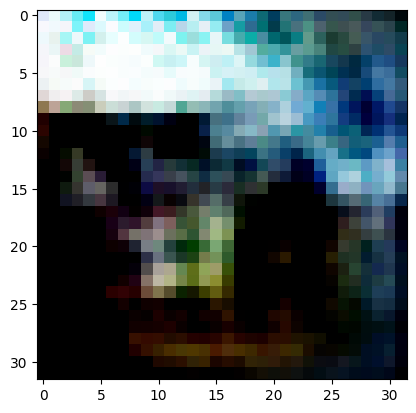

196/196 [==============================] - 13s 50ms/step - d_loss: 1.1205 - g_loss: 1.2993
Epoch 2/50
195/196 [============================>.] - ETA: 0s - d_loss: 1.0403 - g_loss: 1.3869

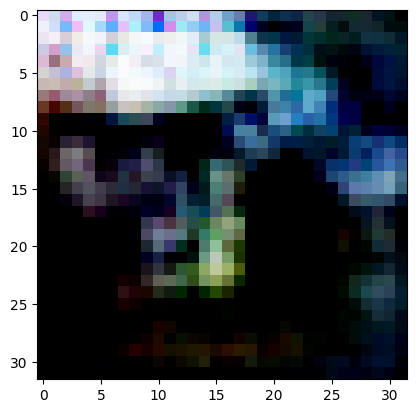

196/196 [==============================] - 10s 51ms/step - d_loss: 1.0406 - g_loss: 1.3884
Epoch 3/50
195/196 [============================>.] - ETA: 0s - d_loss: 1.0754 - g_loss: 1.4800

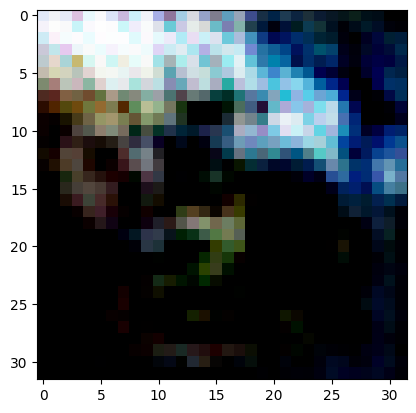

196/196 [==============================] - 10s 51ms/step - d_loss: 1.0738 - g_loss: 1.4815
Epoch 4/50
195/196 [============================>.] - ETA: 0s - d_loss: 1.0174 - g_loss: 1.6133

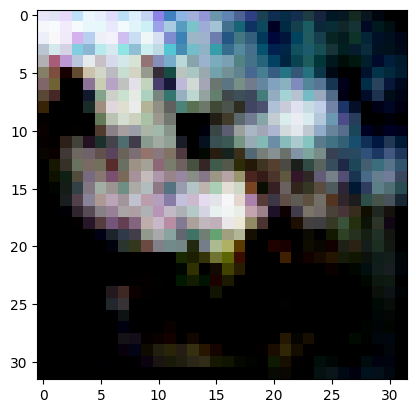

196/196 [==============================] - 10s 52ms/step - d_loss: 1.0175 - g_loss: 1.6144
Epoch 5/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9951 - g_loss: 1.5760

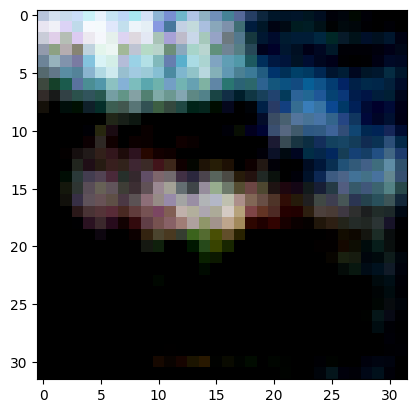

196/196 [==============================] - 10s 49ms/step - d_loss: 0.9951 - g_loss: 1.5760
Epoch 6/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8988 - g_loss: 1.6885

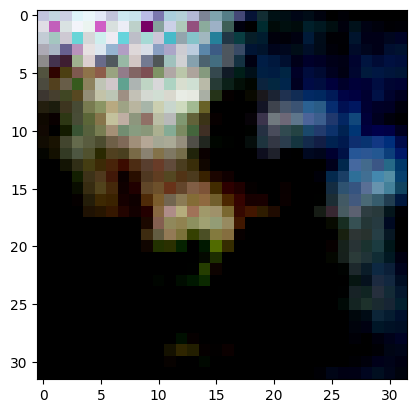

196/196 [==============================] - 10s 50ms/step - d_loss: 0.8987 - g_loss: 1.6885
Epoch 7/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9579 - g_loss: 1.6539

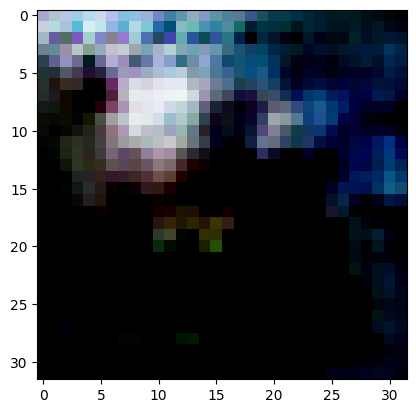

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9590 - g_loss: 1.6533
Epoch 8/50
195/196 [============================>.] - ETA: 0s - d_loss: 1.0133 - g_loss: 1.5506

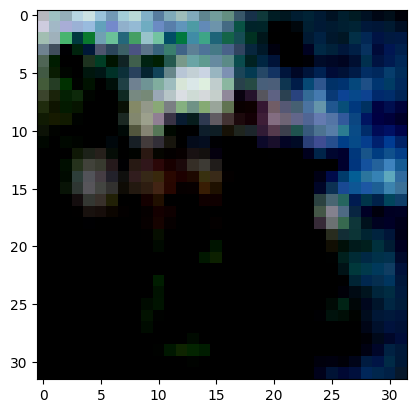

196/196 [==============================] - 10s 51ms/step - d_loss: 1.0126 - g_loss: 1.5525
Epoch 9/50
195/196 [============================>.] - ETA: 0s - d_loss: 1.0496 - g_loss: 1.4342

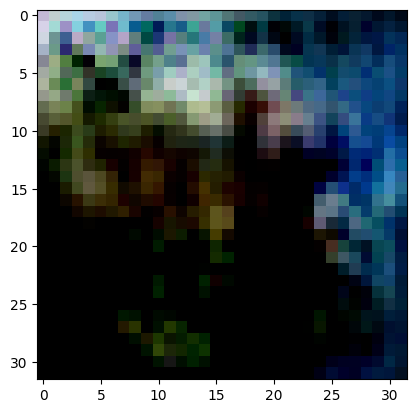

196/196 [==============================] - 10s 52ms/step - d_loss: 1.0500 - g_loss: 1.4353
Epoch 10/50
196/196 [==============================] - ETA: 0s - d_loss: 1.0539 - g_loss: 1.4738

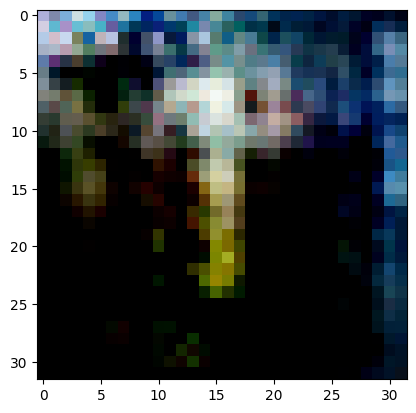

196/196 [==============================] - 10s 50ms/step - d_loss: 1.0539 - g_loss: 1.4738
Epoch 11/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8916 - g_loss: 1.6288

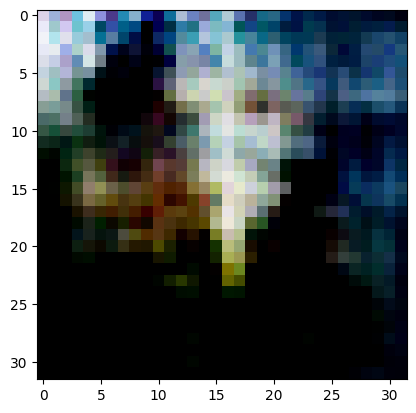

196/196 [==============================] - 10s 51ms/step - d_loss: 0.8919 - g_loss: 1.6289
Epoch 12/50
196/196 [==============================] - ETA: 0s - d_loss: 1.1081 - g_loss: 1.4741

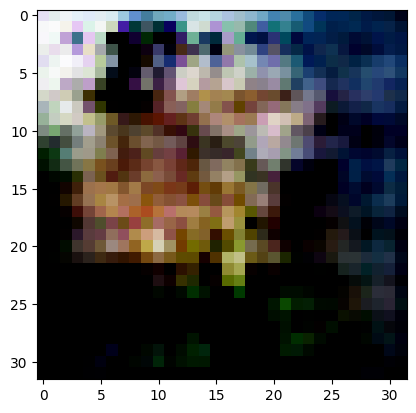

196/196 [==============================] - 10s 51ms/step - d_loss: 1.1081 - g_loss: 1.4741
Epoch 13/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8974 - g_loss: 1.6783

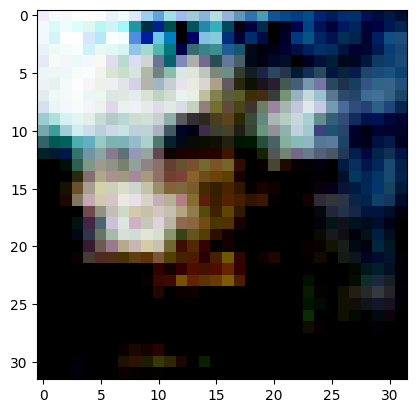

196/196 [==============================] - 10s 51ms/step - d_loss: 0.8992 - g_loss: 1.6773
Epoch 14/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9746 - g_loss: 1.5913

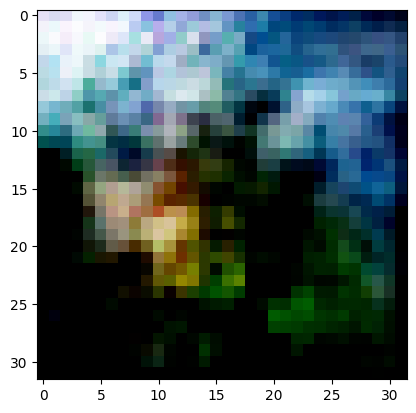

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9755 - g_loss: 1.5907
Epoch 15/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9158 - g_loss: 1.5726

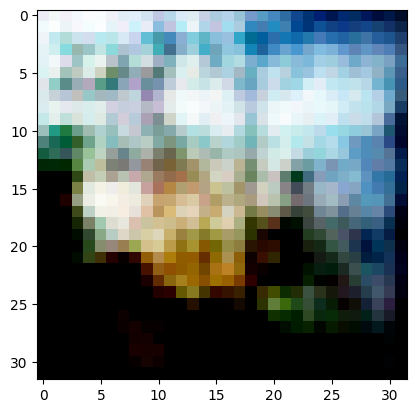

196/196 [==============================] - 10s 51ms/step - d_loss: 0.9158 - g_loss: 1.5717
Epoch 16/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9748 - g_loss: 1.5898

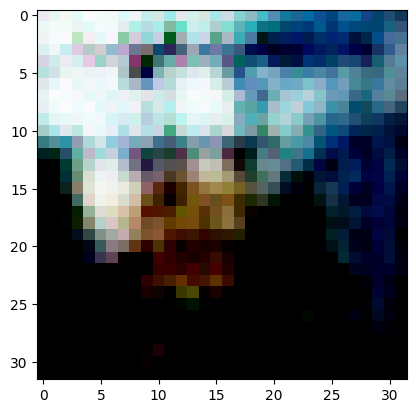

196/196 [==============================] - 10s 51ms/step - d_loss: 0.9765 - g_loss: 1.5887
Epoch 17/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9092 - g_loss: 1.6875

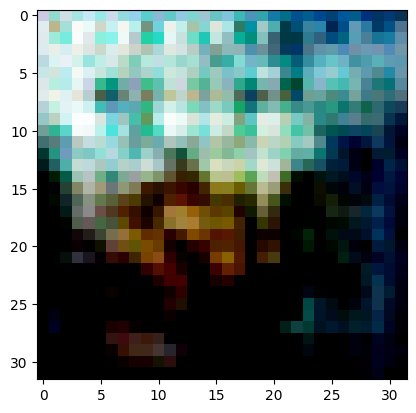

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9090 - g_loss: 1.6888
Epoch 18/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9036 - g_loss: 1.6680

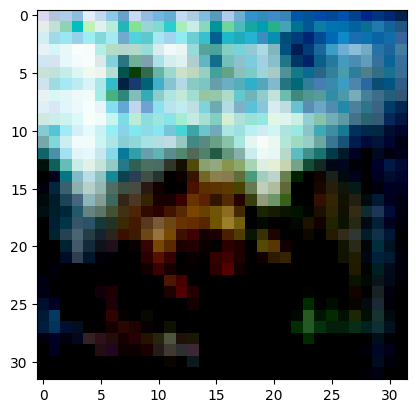

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9036 - g_loss: 1.6680
Epoch 19/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9452 - g_loss: 1.6431

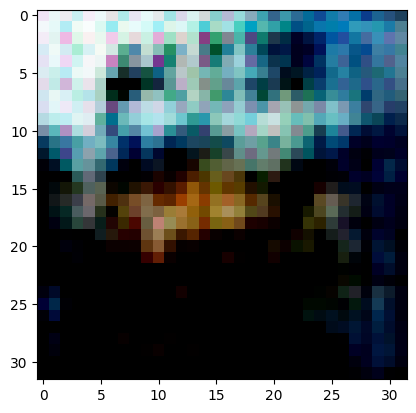

196/196 [==============================] - 10s 51ms/step - d_loss: 0.9448 - g_loss: 1.6439
Epoch 20/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9600 - g_loss: 1.6064

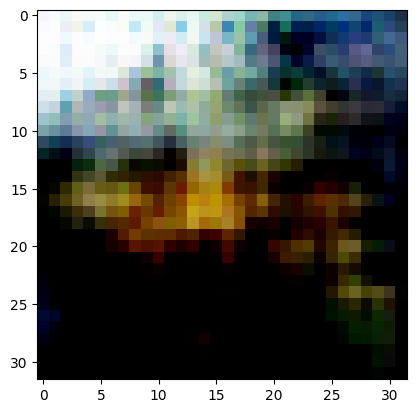

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9583 - g_loss: 1.6072
Epoch 21/50
196/196 [==============================] - ETA: 0s - d_loss: 0.8961 - g_loss: 1.6396

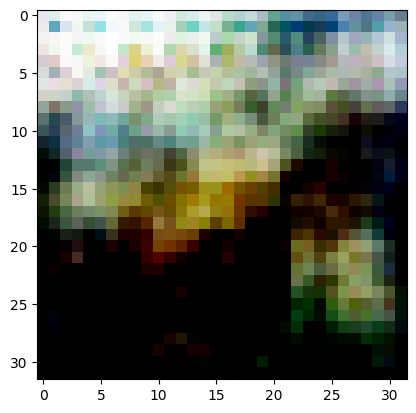

196/196 [==============================] - 10s 49ms/step - d_loss: 0.8961 - g_loss: 1.6396
Epoch 22/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9089 - g_loss: 1.6552

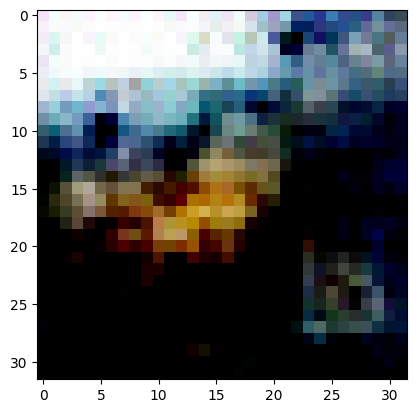

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9089 - g_loss: 1.6552
Epoch 23/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9789 - g_loss: 1.7021

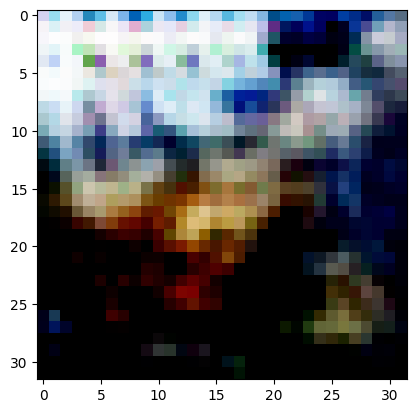

196/196 [==============================] - 10s 51ms/step - d_loss: 0.9794 - g_loss: 1.7023
Epoch 24/50
195/196 [============================>.] - ETA: 0s - d_loss: 1.0145 - g_loss: 1.6625

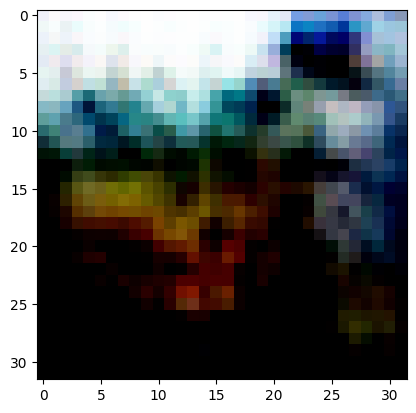

196/196 [==============================] - 10s 50ms/step - d_loss: 1.0141 - g_loss: 1.6613
Epoch 25/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9586 - g_loss: 1.5865

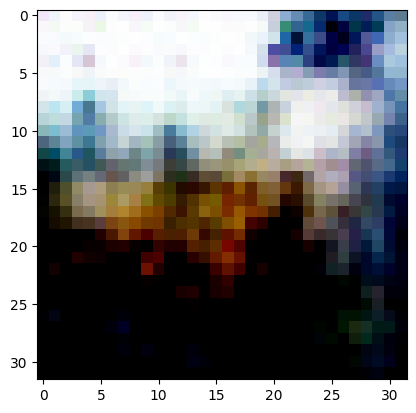

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9581 - g_loss: 1.5865
Epoch 26/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8674 - g_loss: 1.6324

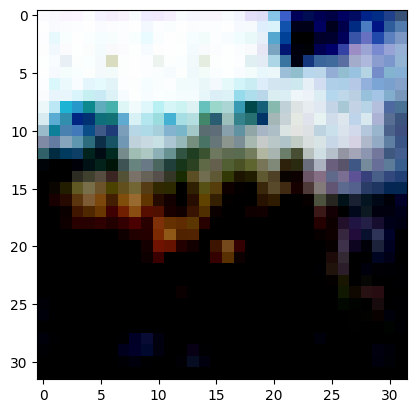

196/196 [==============================] - 10s 50ms/step - d_loss: 0.8708 - g_loss: 1.6299
Epoch 27/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9694 - g_loss: 1.5831

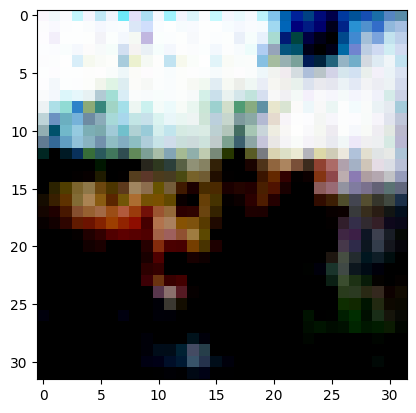

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9694 - g_loss: 1.5831
Epoch 28/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9291 - g_loss: 1.6415

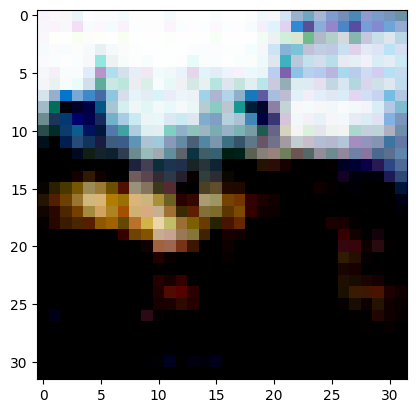

196/196 [==============================] - 10s 52ms/step - d_loss: 0.9279 - g_loss: 1.6423
Epoch 29/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9666 - g_loss: 1.6144

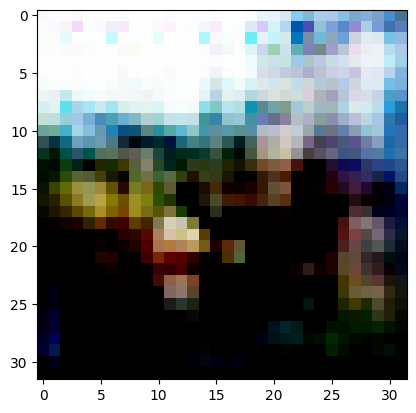

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9666 - g_loss: 1.6144
Epoch 30/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8846 - g_loss: 1.7373

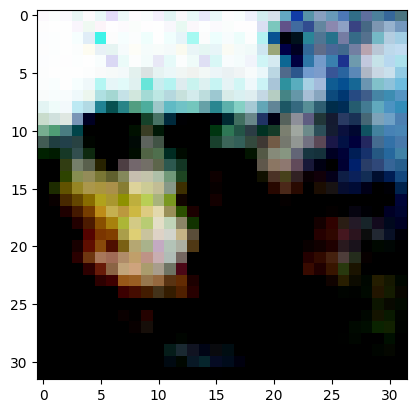

196/196 [==============================] - 10s 50ms/step - d_loss: 0.8866 - g_loss: 1.7347
Epoch 31/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9821 - g_loss: 1.7073

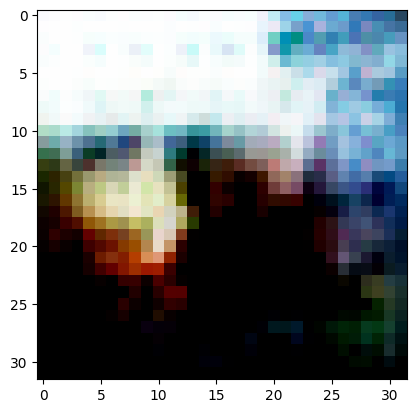

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9809 - g_loss: 1.7073
Epoch 32/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9181 - g_loss: 1.6838

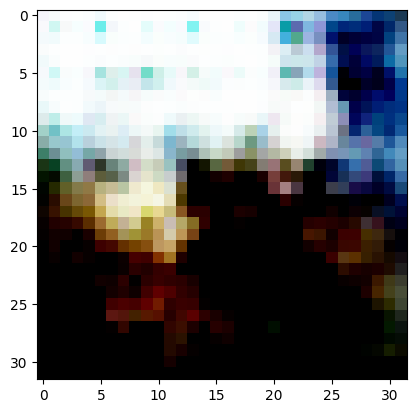

196/196 [==============================] - 10s 49ms/step - d_loss: 0.9181 - g_loss: 1.6838
Epoch 33/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9225 - g_loss: 1.7556

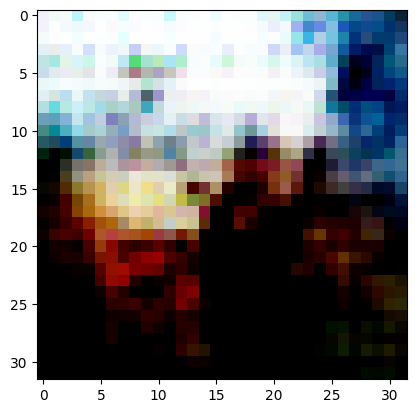

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9228 - g_loss: 1.7559
Epoch 34/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8900 - g_loss: 1.7555

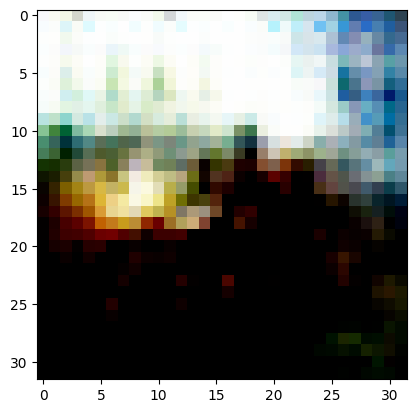

196/196 [==============================] - 10s 50ms/step - d_loss: 0.8916 - g_loss: 1.7560
Epoch 35/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9781 - g_loss: 1.6614

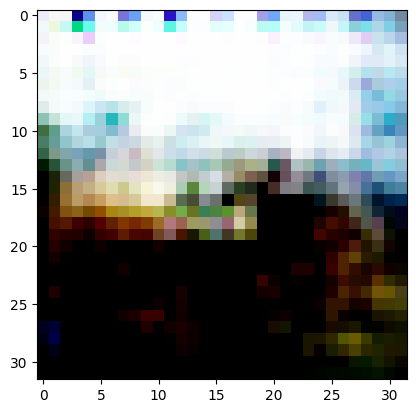

196/196 [==============================] - 10s 49ms/step - d_loss: 0.9772 - g_loss: 1.6613
Epoch 36/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9332 - g_loss: 1.6602

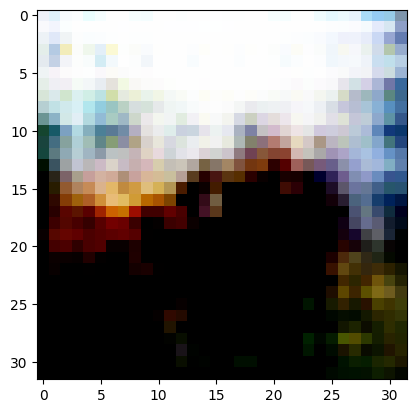

196/196 [==============================] - 10s 49ms/step - d_loss: 0.9332 - g_loss: 1.6602
Epoch 37/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9901 - g_loss: 1.6180

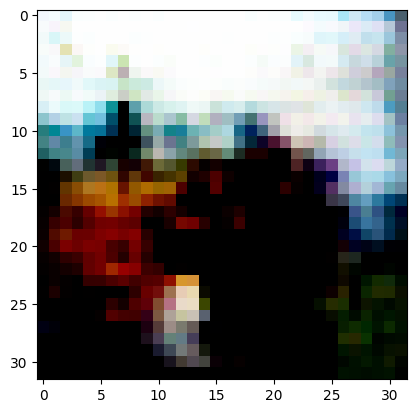

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9887 - g_loss: 1.6186
Epoch 38/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8339 - g_loss: 1.8430

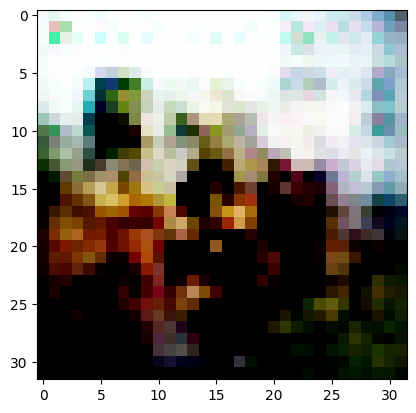

196/196 [==============================] - 10s 50ms/step - d_loss: 0.8336 - g_loss: 1.8452
Epoch 39/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9488 - g_loss: 1.6763

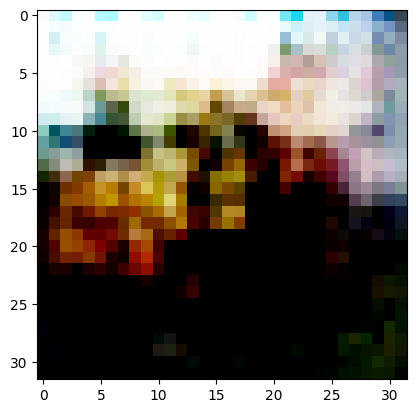

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9488 - g_loss: 1.6763
Epoch 40/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9924 - g_loss: 1.6005

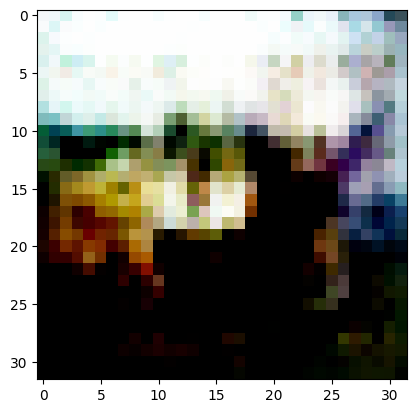

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9924 - g_loss: 1.6005
Epoch 41/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9865 - g_loss: 1.6403

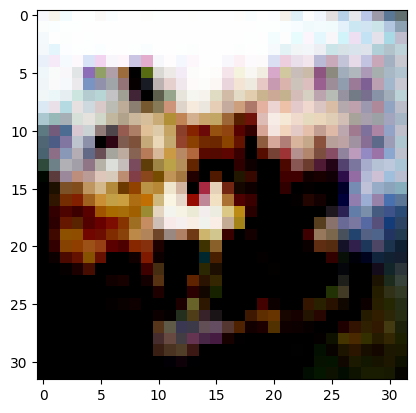

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9868 - g_loss: 1.6387
Epoch 42/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9069 - g_loss: 1.6271

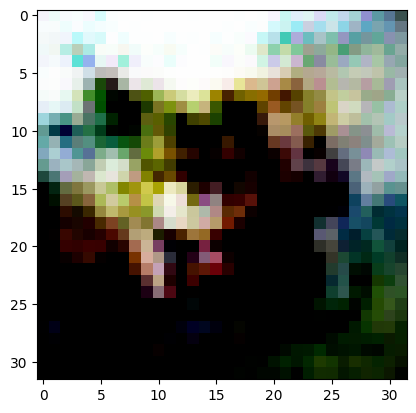

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9069 - g_loss: 1.6271
Epoch 43/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8841 - g_loss: 1.6260

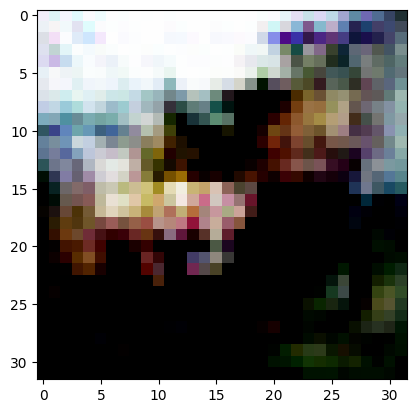

196/196 [==============================] - 10s 49ms/step - d_loss: 0.8840 - g_loss: 1.6260
Epoch 44/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9410 - g_loss: 1.5972

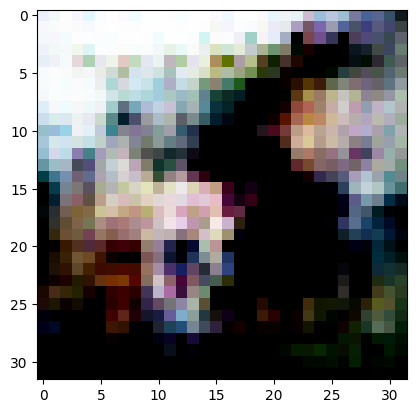

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9405 - g_loss: 1.5970
Epoch 45/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9406 - g_loss: 1.5758

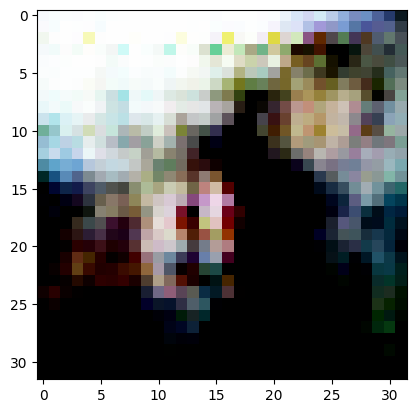

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9413 - g_loss: 1.5747
Epoch 46/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9937 - g_loss: 1.5996

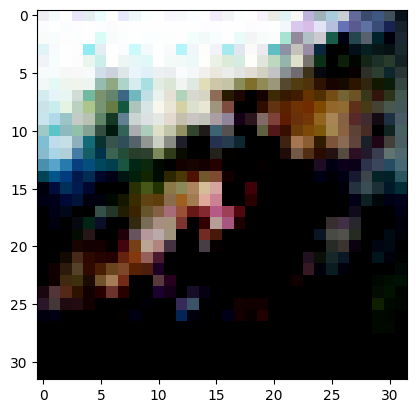

196/196 [==============================] - 10s 50ms/step - d_loss: 0.9939 - g_loss: 1.6000
Epoch 47/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9349 - g_loss: 1.6873

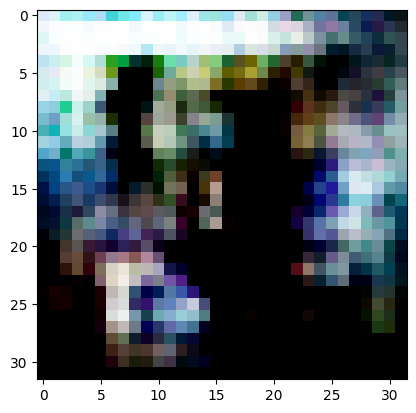

196/196 [==============================] - 10s 49ms/step - d_loss: 0.9349 - g_loss: 1.6873
Epoch 48/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.8996 - g_loss: 1.7644

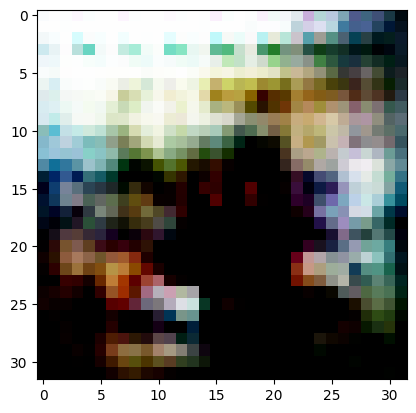

196/196 [==============================] - 10s 49ms/step - d_loss: 0.9001 - g_loss: 1.7642
Epoch 49/50
196/196 [==============================] - ETA: 0s - d_loss: 0.9123 - g_loss: 1.7564

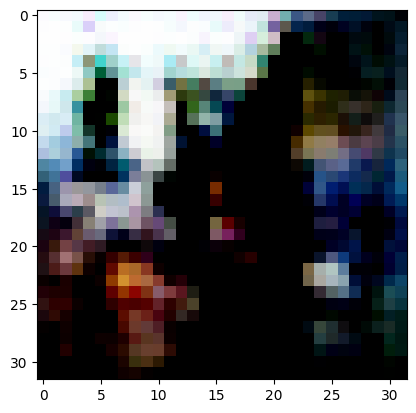

196/196 [==============================] - 10s 51ms/step - d_loss: 0.9123 - g_loss: 1.7564
Epoch 50/50
195/196 [============================>.] - ETA: 0s - d_loss: 0.9572 - g_loss: 1.6947

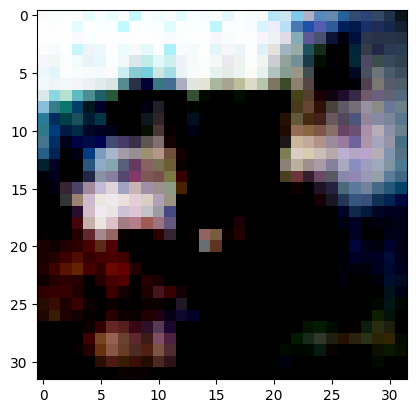

196/196 [==============================] - 10s 49ms/step - d_loss: 0.9565 - g_loss: 1.6955


In [ ]:
gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=tf.keras.losses.BinaryCrossentropy(),
)

gan.fit(train_dataset,
        epochs=EPOCHS,
        callbacks=[GANMonitor(num_img=1,
                              latent_dim=latent_dim)])

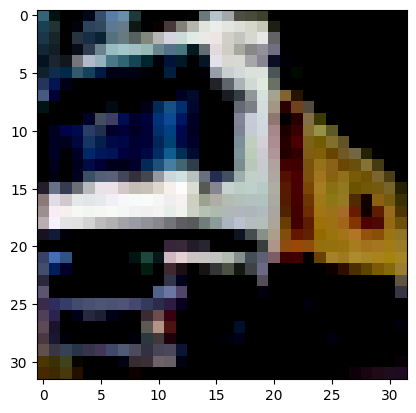

In [ ]:
plt.imshow(x_train[1])


#

In [ ]:
# Create the discriminator.
def define_discriminator(in_shape=(32,32,3), n_classes=10):
	in_label = layers.Input(shape=(1,))
	li = layers.Embedding(n_classes, 50)(in_label)
	n_nodes = in_shape[0] * in_shape[1]
	li = layers.Dense(n_nodes)(li)
	li = layers.Reshape((in_shape[0], in_shape[1], 1))(li)
	in_image = layers.Input(shape=in_shape)
	merge = layers.Concatenate()([in_image, li])
	fe = layers.Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = layers.LeakyReLU(alpha=0.2)(fe)
	fe = layers.Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = layers.LeakyReLU(alpha=0.2)(fe)
	fe = layers.Flatten()(fe)
	fe = layers.Dropout(0.4)(fe)
	out_layer = layers.Dense(1, activation='sigmoid')(fe)
	model = Model([in_image, in_label], out_layer)
	opt = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

def define_generator(latent_dim, n_classes=10):
    # Label input
    in_label = layers.Input(shape=(1,))
    # Embedding for categorical input
    li = layers.Embedding(n_classes, 50)(in_label)
    n_nodes = 128 * 8 * 8  # Adjust the number of nodes based on your architecture
    li = layers.Dense(n_nodes)(li)
    li = layers.LeakyReLU(alpha=0.2)(li)
    li = layers.Reshape((8, 8, 128))(li)  # Reshape to [8, 8, 128]

    # Latent input
    in_lat = layers.Input(shape=(latent_dim,))
    n_nodes = 128 * 8 * 8  # Adjust the number of nodes based on your architecture
    gen = layers.Dense(n_nodes)(in_lat)
    gen = layers.LeakyReLU(alpha=0.2)(gen)
    gen = layers.Reshape((8, 8, 128))(gen)  # Reshape to [8, 8, 128]

    # Concatenate label-related features and latent features
    merge = layers.Concatenate()([gen, li])

    # Upsample to [16, 16, 128]
    gen = layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(merge)
    gen = layers.LeakyReLU(alpha=0.2)(gen)

    # Upsample to [32, 32, 128]
    gen = layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(gen)
    gen = layers.LeakyReLU(alpha=0.2)(gen)

    # Output layer with 3 channels for CIFAR-10 images
    out_layer = layers.Conv2D(3, (7, 7), activation='tanh', padding='same')(gen)

    # Model
    model = Model([in_lat, in_label], out_layer)
    return model




In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load fashion mnist images
def load_real_samples():
  (trainX, trainy), (_, _) = keras.datasets.cifar10.load_data()
  X = np.expand_dims(trainX, axis=-1)
  X = X.reshape(X.shape[0], 32, 32, 3)
  X = X.astype('float32')
  X = (X - 127.5) / 127.5
  return [X, trainy]

# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = np.random.randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = np.ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = np.random.randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = np.zeros((n_samples, 1))
	return [images, labels_input], y

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=30, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = np.ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator.h5')

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 7ms/step
>24, 231/390, d1=0.709, d2=0.671 g=0.724
2/2 [==============================] - 0s 6ms/step
>24, 232/390, d1=0.699, d2=0.695 g=0.716
2/2 [==============================] - 0s 9ms/step
>24, 233/390, d1=0.699, d2=0.704 g=0.715
2/2 [==============================] - 0s 5ms/step
>24, 234/390, d1=0.706, d2=0.690 g=0.705
2/2 [==============================] - 0s 11ms/step
>24, 235/390, d1=0.685, d2=0.700 g=0.702
2/2 [==============================] - 0s 8ms/step
>24, 236/390, d1=0.695, d2=0.699 g=0.716
2/2 [==============================] - 0s 11ms/step
>24, 237/390, d1=0.688, d2=0.696 g=0.710
2/2 [==============================] - 0s 5ms/step
>24, 238/390, d1=0.695, d2=0.685 g=0.718
2/2 [==============================] - 0s 9ms/step
>24, 239/390, d1=0.711, d2=0.678 g=0.726
2/2 [==============================] - 0s 6ms/step
>24, 240/390, d1=0.701, d2=0.684 g=0.723
2/2 [======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


>30, 390/390, d1=0.698, d2=0.688 g=0.718


4/4 [==============================] - 1s 79ms/step


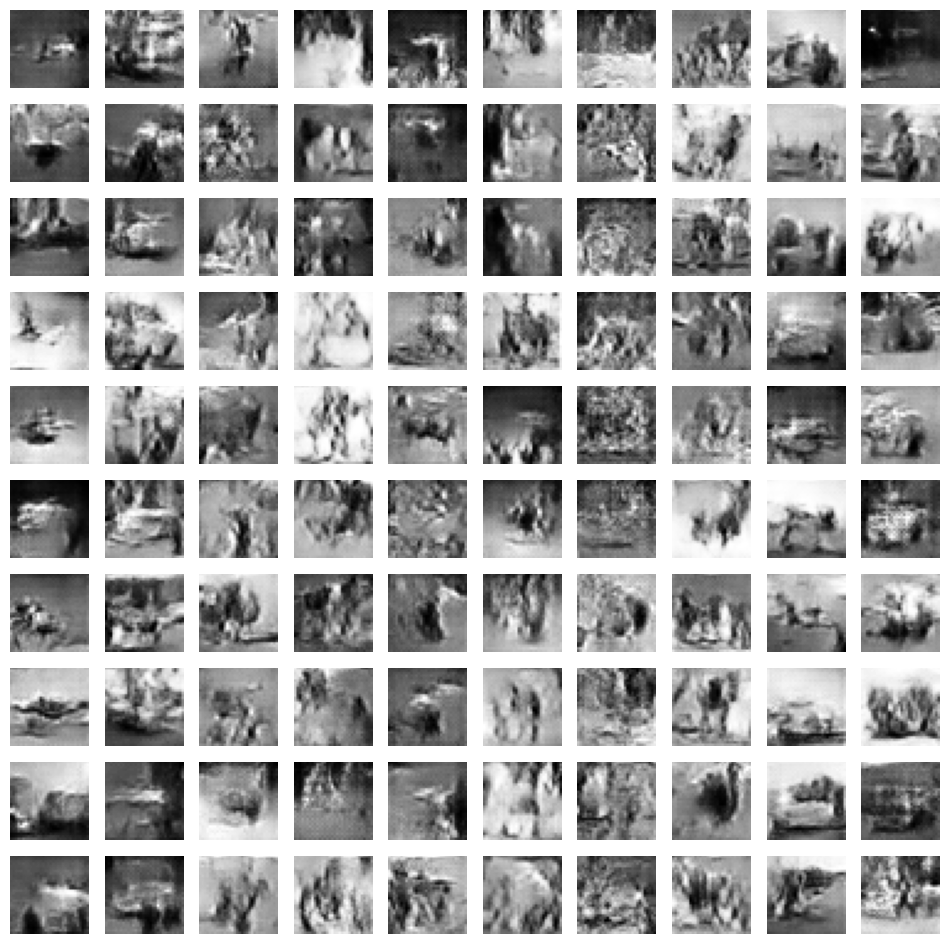

In [ ]:
# plot generator outputs
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = np.random.randint(0, n_classes, n_samples)
	return [z_input, labels]

# create and save a plot of generated images
def plot_generated(examples, n):
  # plot images
  fig = plt.figure(figsize=(12, 12))
  for i in range(n * n):
    # define subplot
    plt.subplot(n, n, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(examples[i, :, :, 0], cmap='gray')

# load model
model = tf.keras.models.load_model('cgan_generator.h5')
# generate images
latent_points, labels = generate_latent_points(100, 100)
# specify labels
labels = np.asarray([x for _ in range(10) for x in range(10)])
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
plot_generated(X, 10)